In [21]:
import cupy as cp

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import os

In [3]:
os.getcwd()

'/Users/srt/Desktop/MTP_2/CODE/CODE_march'

In [18]:
os.chdir("../")

In [19]:
data = np.genfromtxt('par_initial_1.csv',delimiter=',',dtype=None)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [20]:
d = np.zeros(((len(data[:,2])),(len(data[:,2]))),dtype = float)
#Distance matrix
d = np.zeros(((len(data[:,2])-1),(len(data[:,2])-1)),dtype = float)
for i in range(1,len(data[1:,1])):
    for j in range(i,len(data[:,1])):
        d[i-1][j-1] = ((float(data[j,0])-float(data[i,0]))**2+(float(data[j,1])-float(data[i,1]))**2+(float(data[j,2])-float(data[i,2]))**2)**0.5
        #print("d{}{}".format(i,j),d[i][j])
p = np.amax(d)
print(p)

6886.137233214424


In [21]:
q = 0
r = 0
for q in range(len(data[:,2])-1):
    for r in range(len(data[:,2])-1):
        k = 256/p
        d[q][r] = k*d[q][r]

In [22]:
print(np.amax(d))

256.0


In [23]:
b = np.zeros((((len(data[:,2])-1))),dtype = float)
n = np.zeros((((len(data[:,2])-1))),dtype = float)
t = np.zeros((((len(data[:,2])-1))),dtype = float)
 
for i in range(len(data[1:,3])):
    b[i] = float(data[1+i,3])
    n[i] = float(data[1+i,4])
    t[i] = float(data[1+i,6])

In [24]:
#Normalising b_type
i = 0
q = np.amax(b)

for i in range(len(b)):
    k = 256/q
    b[i] = k*b[i]

#Normalising n_type
i = 0
q = np.amax(n)
for i in range(len(n)):
    k = 256/q
    n[i] = k*n[i]


#Normalising Theta
i=0
k = 256/360
for i in range(len(t)):
    #k = 256/360
    t[i] = k*t[i]

In [25]:
#Adding Theta Values in d matrix
i = 1
for i in range(len(t)):
    if i%2 != 0 :
        d[i][i-1] = t[i-1]
    else:
        continue
#Adding the values of b type and n-type in d matrix
for k in range(len(b)):
    if (k%2) == 0:
        d[k][k]=b[k]
    else :
        d[k][k] = n[k]
        

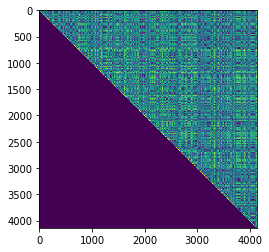

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [30]:
#plotting the result 
fig , ax = plt.subplots()
plt.imshow(d)
plt.show()
plt.figure()

In [12]:
fig = vp.Fig(size=(600, 500), show=False)